In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15108\152584755.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000
2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200
2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400
2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400
...,...,...,...,...,...
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200


# 2. Data Exploration and Vitualization

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2515, 5)

In [5]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,105.883237,106.948368,104.711205,105.784618,1.074179e+08
std,69.479482,70.164066,68.717175,69.409051,6.228510e+07
min,20.624048,20.927682,20.425434,20.546432,1.597664e+07
25%,39.988346,40.371618,39.632022,39.969597,6.552405e+07
50%,108.081100,109.413741,106.130818,108.030021,9.284400e+07
75%,166.980598,168.359463,165.420576,167.180824,1.302826e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000
2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200
2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400
2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400


In [9]:
df = df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400


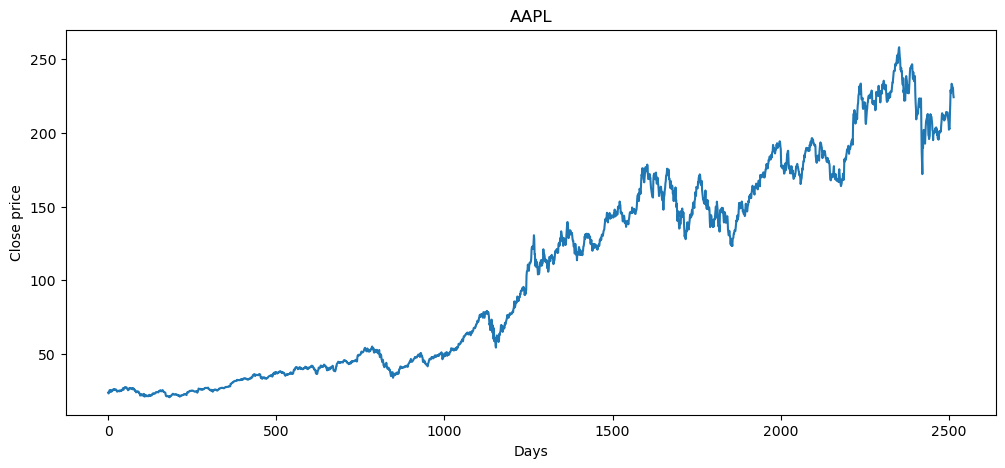

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days');
plt.ylabel('Close price');


# 3. Feature Engineering

- Moving Average -> to identify the stock like whether it is in theh uptrend or downtrend.
- In other words, so the Moving Average will give you the smooth pattern of the stock trends. 

In [12]:
# 10, 20, 30,40, 50,60, 70, 80, 90, 100

# MA of 6 days ==> null null null null 30 40 


### calculating the average theh sum of numbers

In [13]:
temp_df = [10, 20, 30,40, 50,60, 70, 80, 90, 100]
print(sum(temp_df[1:6])/5)

40.0


### calculating the Moving Average with python function

In [14]:
df1 = pd.DataFrame([10, 20, 30,40, 50,60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [15]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


# 100 Days moving average

In [16]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000,NaN
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200,NaN
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400,NaN
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400,NaN
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN


In [17]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000,NaN
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200,NaN
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400,NaN
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400,NaN
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN
...,...,...,...,...,...,...,...
98,2016-01-12,22.559723,22.724476,22.306952,22.692879,196616800,NaN
99,2016-01-13,21.979706,22.837319,21.959395,22.640970,249758400,25.316971
100,2016-01-14,22.460415,22.677076,21.607317,22.108343,252680400,25.303905


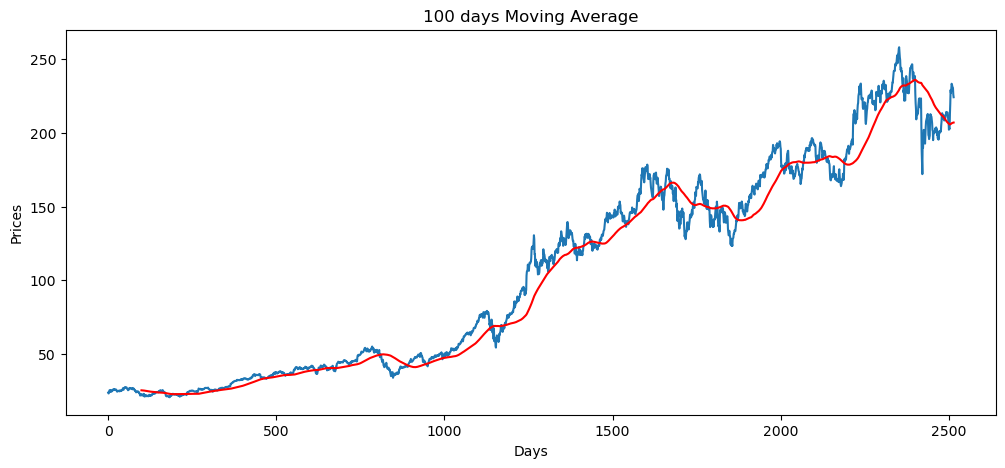

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.title('100 days Moving Average')
plt.xlabel('Days');
plt.ylabel('Prices');


# 200 Days moving average

In [19]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000,NaN,NaN
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200,NaN,NaN
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400,NaN,NaN
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400,NaN,NaN
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN,NaN


In [20]:
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000,NaN,NaN
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200,NaN,NaN
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400,NaN,NaN
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400,NaN,NaN
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-06-06,22.516605,23.260843,22.270050,22.370498,93170000,22.718375,NaN
199,2016-06-07,22.607922,22.799689,22.591941,22.658146,89638000,22.724657,24.020814
200,2016-06-08,22.587381,22.728922,22.528025,22.605644,83392400,22.725926,24.014916


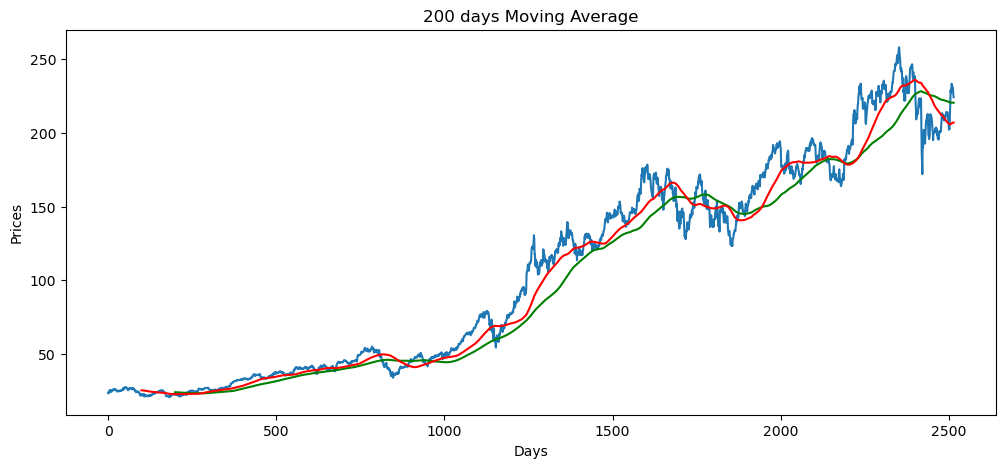

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_200'], 'g');
plt.plot(df['MA_100'], 'r');
plt.title('200 days Moving Average')
plt.xlabel('Days');
plt.ylabel('Prices');


In [22]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-21,23.766979,25.146794,23.742259,24.816447,513102000,NaN,NaN
1,2015-08-24,23.173702,24.450144,20.674753,21.319716,648825200,NaN,NaN
2,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400,NaN,NaN
3,2015-08-26,24.650156,24.695100,23.607429,24.065868,387098400,NaN,NaN
4,2015-08-27,25.376009,25.447921,24.724305,25.220950,338464400,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700,206.730583,220.507259
2511,2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200,206.807446,220.500115
2512,2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600,206.903156,220.489977


## Calculating % changed in each trading session

In [23]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,23.766979,NaN
1,23.173702,-0.024962
2,23.313026,0.006012
3,24.650156,0.057355
4,25.376009,0.029446
...,...,...
2510,231.589996,-0.005112
2511,230.889999,-0.003023
2512,230.559998,-0.001429


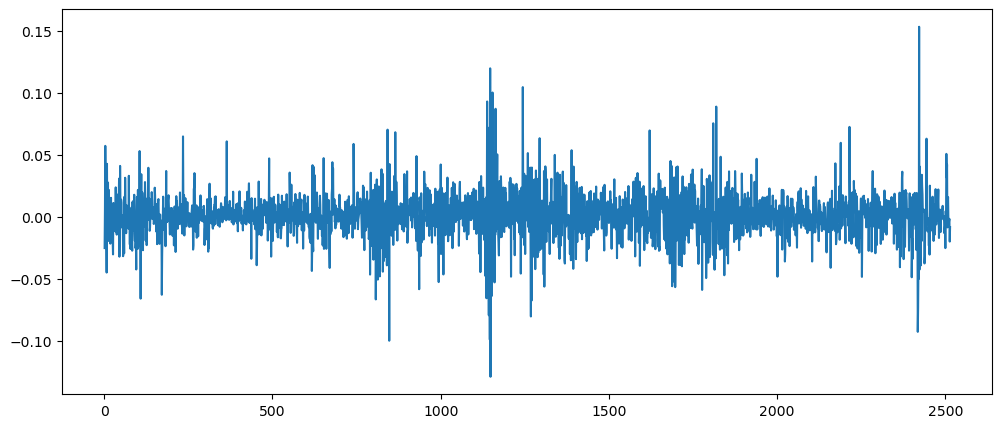

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [25]:
df.shape

(2515, 9)

## Splitting the data into training and testing datasets


In [26]:
data_training = pd.DataFrame(df.Close[0: int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        23.766979
1        23.173702
2        23.313026
3        24.650156
4        25.376009
...            ...
1755    165.871643
1756    169.425537
1757    170.498611
1758    170.341095
1759    171.837479

[1760 rows x 1 columns]
Ticker        AAPL
1760    171.443665
1761    168.854523
1762    164.965927
1763    164.631241
1764    164.926575
...            ...
2510    231.589996
2511    230.889999
2512    230.559998
2513    226.009995
2514    224.189896

[755 rows x 1 columns]


In [27]:
data_training

Ticker,AAPL
0,23.766979
1,23.173702
2,23.313026
3,24.650156
4,25.376009
...,...
1755,165.871643
1756,169.425537
1757,170.498611
1758,170.341095


In [28]:
data_testing

Ticker,AAPL
1760,171.443665
1761,168.854523
1762,164.965927
1763,164.631241
1764,164.926575
...,...
2510,231.589996
2511,230.889999
2512,230.559998
2513,226.009995


### Scaling down the data between 0 - 1
- Because computers only understand only 0 and 1

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01991477],
       [0.01615555],
       [0.01703836],
       ...,
       [0.94966068],
       [0.9486626 ],
       [0.95814424]], shape=(1760, 1))

In [31]:
type(data_training_array)

numpy.ndarray

In [32]:
data_training_array.shape

(1760, 1)

### 5. Sequence Creation

In [33]:
12, 13, 14, 15, 16, 17, 18, 19, 20, 21

(12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [34]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
y_train

array([0.0116359 , 0.00821816, 0.007546  , ..., 0.94966068, 0.9486626 ,
       0.95814424], shape=(1660,))

In [36]:
x_train.ndim

3

In [37]:
y_train.ndim

1

In [38]:
x_train.shape

(1660, 100, 1)

In [39]:
y_train.shape

(1660,)

## 6. Model Building
- #Tensorflow -> it is  aaframework for numerical computation and maachinne learning.
- it provides various tools for building and deploying deep learning models
- #keras -> it is a high level API for building and training neural netwroks

In [40]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [41]:
#ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [42]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7.  Model Training

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - loss: 0.0151
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 5.3845e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.3796e-04
Epoch 4/50
33/52 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 4.2506e-04

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
# Save the trained model
model.save('Stock_prediction_model.keras')

## 8. Preparing Test Data

In [ ]:
data_training.tail(100)

In [ ]:
data_testing

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
past_100_days

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test

## 9. Making  Prediction

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

## 10. Model Evaluation

In [ ]:
# Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
print(f" Mean Squared Error (RMSE): {rmse}")

In [ ]:
## R-Squared

r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")